<h2 align="center">Xử lý và Phân tích Dữ liệu bán hàng Laptop</h2> 

_Cập nhật sáng 9h25 ngày 02/02/2022_

_Cập nhật tối 11h53 ngày 03/02/2022_

_Cập nhật chiều 3h ngày 06/02/2022_

_Cập nhật tối 8h47 PM ngày 12/02/2022_



<!-- ![image-3.png](attachment:image-3.png){ width=100% } -->


<img src="draw.png" alt="draw" width=100%/>




++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



## Table of Contents

*  [**A. Business Understanding and Problem Definition**](#A)
    *  [1. Nhận xét](#A1)
*  [**B. Data Understainding**](#B)
    *  [1. Loading Data](#B1)
    *  [2.General Information About Data](#B2)
    *  [3.Ideal Clean](#B3)
*  [**C. Handling data**](#C)
    *  [1. Handle Missing Value](#C1)
    *  [2. Merge Two Table](#C2)
*  [**D. Modeling**](#D)
    *  [1. Select And Prepair Feature And Target For Model](#D1)
    *  [2. Training Model](#D2)
*  [**E. Evaluating Models**](#E)
<!--     *  [1. ](#C) -->
*  [**F. Conclusion**](#F)
<!--     *  [1. ](#C1)     -->

    
    .
    
    
    
    
    
    
    
    
    .
    ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

### A. Business Understanding and Problem Definition <a class="anchor" id="A"></a>

**Đây là một bộ dữ liệu được trích xuất từ một dự án thương mại điện tử chuyên mua bán các thiết bị điện tử gia dụng - Theo BTC**

#### Problem:
1. Mô tả các đặc trưng của khác hành mua máy tính
2. Nhận xét về tình hình tiêu thụ máy tính và bán hàng của các cửa hàng
3. Tư vấn cho người mua như thế nào để đạt hiệu quả bán hàng cao nhất?
4. Dưới góc nhìn Data Scientist, bạn có thể tư vấn gì cho một sàn giao dịch điện tử về mảng máy tính

#### Meta Data
Mô tả về dữ liệu: Gồm 2 bảng CustomerProfile và Sale

Tại bảng 2 chúng tôi có xử lý loại bỏ 4 quan sát mất thông tin ở trường CustomerID, sửa thông tin ngày sai lệch như: ngày 31/02, 30/02, năm 1990 -> 2020 nhờ logic thông thường.

Bảng 1 CustomerProfile (1100 quan sát -1100 row):

■ KH_ID:Mã khách hàng - sinh viên {Identify key}

■ GioiTinh: Giới tính của sinh viên {Nominal}

■ QueQuan: Quê quán của sinh viên {Nominal}

■ NamHocThu: Năm học hiện tại của sinh viên {Internal}

■ ChuyenNganh: Chuyên ngành học của sinh viên {Nominal}

■ NgheNghiepGiaDinh: Nghề nghiệp gia đình {Nominal}

■ ChiTieuHangThang: Số tiền chi tiêu hàng tháng của sinh viên {Internal}

■ ThoiGianSuDung: Thời gian sử dụng laptop {Internal}

■ MucDichSuDungLaptop: Các mục đích sử dụng laptop {String -> Có thể onehot}

■ MucDoHaiLong: 1->5 Theo mức độ hài lòng tăng dần {Internal}

■ Các yếu tố cân nhắc khi chọn mua laptop theo mức độ: {Internal}
YeuToThuongHieuSP, YeuToCauHinh, YeuToTocDoXuLy, YeuToGia, YeuToThietKe, YeuToUyTinNhaBanle, YeuToBaoMat, YeuToBaoHanh, YeuToKhuyenMai

1 – Rất không quan trọng
2 – Không quan trọng
3 – Bình thường
4 – Quan trọng
5 – Rất quan trọng


Bảng 2 Sale(1567 quan sát):

■ CustomerID: Kênh mua sắm {Identify key}

■ OrderID: Mã giao dịch - thông tin chưa được cung cấp {Identify key}

■ Channel: Kênh mua sắm {Nominal}

■ PaymentType: Hình thức thanh toán {Nominal}

■ Brand: Thương hiệu laptop {Nominal}

■ Shop: Cửa hàng {Nominal}

■ Pomotion: Khuyến mãi {Nominal}

■ SalePrice: Khuyến mãi {Ratio}

■ Reference: Kênh thông tin biết đến sản phẩm và cửa hàng{String -> Có thể Onehot}

■ SaleDate: ngày bán hàng {datetime}

## 1.  Nhận xét:<a class="anchor" id="A1"></a>

* tại bảng 1

    - Chưa biết thông tin: MucDoHaiLong tại bảng 1 để làm gì, hài lòng sau khi sử dụng, thu thập như thế nào, gọi điện ?

    - Các yếu tố cân nhắc khi chọn mua laptop => gợi ý mua máy, nhưng thông tin máy chưa rõ ràng
Xem liên quan giá không?
=> từ thông tin này gợi ý được giá không

Nhìn chung dữ liệu tại bảng 1: là nomial, category muốn sử dụng cần embeding, onehot encoding

Trường quan trọng: ChiTieuHangThang, ThoiGianSuDung, MucDichSuDungLaptop
* tại bảng 2:
SalePrice: có thể phân cụm khánh hàng, theo chi tiêu cũng có thể phân cụm khách hàng

Nhìn chung dữ liệu tại bảng 2: là nominal, có saledate để phân tích theo timeseries


## B. Data Understainding <a class="anchor" id="B"></a>

## 1. Loading Data <a class="anchor" id="B1"></a>

In [173]:
#Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [174]:
# Data in table CustomerProfile
df_CustomerProfile = pd.read_excel("DataSet.xlsx", sheet_name=1)
df_CustomerProfile.head(5)

,KH_ID,GioiTinh,QueQuan,NamHocThu,ChuyenNganh,NgheNghiepGiaDinh,ChiTieuHangThang,ThoiGianSuDung,MucDichSuDungLaptop,MucDoHaiLong,YeuToThuongHieuSP,YeuToCauHinh,YeuToTocDoXuLy,YeuToGia,YeuToThietKe,YeuToUyTinNhaBanle,YeuToBaoMat,YeuToBaoHanh,YeuToKhuyenMai
0,CTM10164,Nam,Quảng Trị,Năm 2,Luật kinh tế,Nông dân,Từ 1.500.000 đến 3.000.000,Từ 6 tháng - 1 năm,"Học tập, Làm việc, Chơi game, Giải trí (xem ph...",5,3,3,3,3,3,3,3,3,3
1,CTM10246,Nam,Đà Nẵng,Năm 4,Hệ thống thông tin quản lý,Kinh doanh tự do,Từ 3.000.000 đến 5.000.000,Trên 2 năm,"Học tập, Làm việc, Chơi game",4,4,5,5,4,3,4,1,5,5
2,CTM1028,Nữ,Nghệ An,Năm 3,Thương mại điện tử,Nông dân,Từ 1.500.000 đến 3.000.000,Trên 2 năm,"Học tập, Làm việc",4,4,3,4,4,3,4,2,4,4
3,CTM10516,Nam,Gia Lai,Năm 2,Thương mại,Nông dân,Từ 1.500.000 đến 3.000.000,Từ 1 năm đến 2 năm,"Học tập, Làm việc, Giải trí (xem phim, nghe nh...",4,3,4,4,3,2,3,3,4,2
4,CTM10573,Nam,Thừa Thiên Huế,Năm 4,Tài chính doanh nghiệp,Nông dân,Từ 1.500.000 đến 3.000.000,Trên 2 năm,"Học tập, Làm việc",3,3,4,3,4,1,4,1,3,4


In [175]:
# Data in table Sale
df_Sale = pd.read_excel("DataSet.xlsx", sheet_name=2)
df_Sale.head(5)

,CustomerID,OrderID,Channel,PaymentType,Brand,Shop,Promotion,SalePrice,SaleDate,Reference
0,CTM012,OTS015,Online,Thẻ,LenovoX1,Phong Vũ,Không,27000000.0,2020-04-23 00:00:00,NaN
1,CTM10164,OTS831,Offline,Tiền mặt,Apple,Viettel Store,Không,3020000.0,2020-08-03 00:00:00,Nhân viên cửa hàng bán Laptop
2,CTM10246,OTS293,Offline,Tiền mặt,Dell,FPT Shop,Có,18310000.0,2020-10-09 00:00:00,"Nhân viên cửa hàng bán Laptop, Mạng xã hội, We..."
3,CTM1028,OTS34756,Offline,Tiền mặt,MSI,Phong Vũ,Không,12203000.0,2020-05-24 00:00:00,"Thông qua người thân, bạn bè, Nhân viên cửa hà..."
4,CTM1028,OTS1044,Offline,Tiền mặt,Asus,Thế giới di động,Có,13070000.0,2020-10-08 00:00:00,Nhờ người có chuyên môn tư vấn


In [176]:
# chuyển nó về df1, và df2 tương ứng 2 bảng profile khách hàng và bán hàng
# convert df1, df2 follow customerprofile and sale table
df1 = df_CustomerProfile
df2 = df_Sale


## 2.General information about data <a class="anchor" id="B2"></a>

### Quan sát bảng 1 - customer profile

In [177]:
# xem xét phân phối dữ liệu số, các trường mức độ hài lòng, yếu tố thương hiệu, 
#yếu tố cấu hình, yếu tố thiết kế, yếu tố uy tín nha bán lẻ, yếu tố bảo mật, yếu tố bảo hành, yếu tố khuyến mại
df1.describe()

,MucDoHaiLong,YeuToThuongHieuSP,YeuToCauHinh,YeuToTocDoXuLy,YeuToGia,YeuToThietKe,YeuToUyTinNhaBanle,YeuToBaoMat,YeuToBaoHanh,YeuToKhuyenMai
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,3.818182,3.580909,3.484545,3.752727,3.867273,3.345455,3.591818,3.012727,3.882727,3.835455
std,0.849791,0.945176,1.021488,0.879833,0.795015,1.068503,0.961368,1.054399,0.824926,0.893418
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000
50%,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [178]:
sorted(round(df1.mean(),2))

<ipython-input-178-93a72a4fc8af>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sorted(round(df1.mean(),2))


[3.01, 3.35, 3.48, 3.58, 3.59, 3.75, 3.82, 3.84, 3.87, 3.88]

========================================

**Tầm quan trọng các yếu tố:**

Ta lấy độ trung bình đại diện cho tầm quan trọng của 1 yếu tố

Phân ra 3 loại: theo độ trung bình

+ Loại 1: từ 3.01 -3.5

+ Loại 2: từ 3.5 - 3.8
+ Loại 3: từ 3.8 -3.9

Yếu tố loại 1 ở mức 3. ->3.5 với mức độ quan trọng bình thường -> Gần quan trọng ta không quan tâm

Các yếu tố quan trọng: 3.8 ->3.9 với mức độ Quan Trọng là quan trọng
là Yếu tố giá, Yếu tố bảo hành, Yếu tố khuyến mãi

=> Tập trung để nhập hàng quan tâm đến giá cũng như gia tăng chương trình bảo hành khuyến mãi để thu hút khách hàng.

**Kết luận: Giá cả sẽ là thuộc tính Focus**

=========================================

In [179]:
# Xem xét dữ liệu bị null, hoặc missing
import seaborn as sns
sns.set(style="whitegrid")
# plt.style.use('white')
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
colormap = sns.diverging_palette(220, 10, as_cmap=True)

<AxesSubplot:>

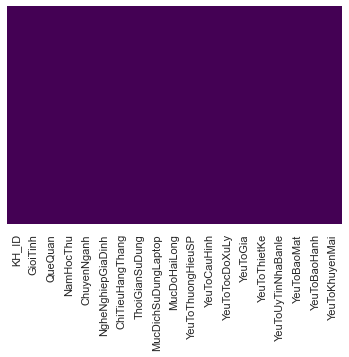

In [180]:
sns.heatmap(df1.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

Không có dữ liệu bị mất mát

In [181]:
# Số trường thông tin: bảng này:
len(list(df1.columns))

19

In [182]:
list(df1.columns)

['KH_ID',
 'GioiTinh',
 'QueQuan',
 'NamHocThu',
 'ChuyenNganh',
 'NgheNghiepGiaDinh',
 'ChiTieuHangThang',
 'ThoiGianSuDung',
 'MucDichSuDungLaptop',
 'MucDoHaiLong',
 'YeuToThuongHieuSP',
 'YeuToCauHinh',
 'YeuToTocDoXuLy',
 'YeuToGia',
 'YeuToThietKe',
 'YeuToUyTinNhaBanle',
 'YeuToBaoMat',
 'YeuToBaoHanh',
 'YeuToKhuyenMai']

In [183]:
df1

,KH_ID,GioiTinh,QueQuan,NamHocThu,ChuyenNganh,NgheNghiepGiaDinh,ChiTieuHangThang,ThoiGianSuDung,MucDichSuDungLaptop,MucDoHaiLong,YeuToThuongHieuSP,YeuToCauHinh,YeuToTocDoXuLy,YeuToGia,YeuToThietKe,YeuToUyTinNhaBanle,YeuToBaoMat,YeuToBaoHanh,YeuToKhuyenMai
0,CTM10164,Nam,Quảng Trị,Năm 2,Luật kinh tế,Nông dân,Từ 1.500.000 đến 3.000.000,Từ 6 tháng - 1 năm,"Học tập, Làm việc, Chơi game, Giải trí (xem ph...",5,3,3,3,3,3,3,3,3,3
1,CTM10246,Nam,Đà Nẵng,Năm 4,Hệ thống thông tin quản lý,Kinh doanh tự do,Từ 3.000.000 đến 5.000.000,Trên 2 năm,"Học tập, Làm việc, Chơi game",4,4,5,5,4,3,4,1,5,5
2,CTM1028,Nữ,Nghệ An,Năm 3,Thương mại điện tử,Nông dân,Từ 1.500.000 đến 3.000.000,Trên 2 năm,"Học tập, Làm việc",4,4,3,4,4,3,4,2,4,4
3,CTM10516,Nam,Gia Lai,Năm 2,Thương mại,Nông dân,Từ 1.500.000 đến 3.000.000,Từ 1 năm đến 2 năm,"Học tập, Làm việc, Giải trí (xem phim, nghe nh...",4,3,4,4,3,2,3,3,4,2
4,CTM10573,Nam,Thừa Thiên Huế,Năm 4,Tài chính doanh nghiệp,Nông dân,Từ 1.500.000 đến 3.000.000,Trên 2 năm,"Học tập, Làm việc",3,3,4,3,4,1,4,1,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,CTM99547,Nam,Quảng Trị,Năm 1,Hệ thống thông tin quản lý,Nông dân,Từ 1.500.000 đến 3.000.000,Dưới 6 tháng,"Học tập, Chơi game, Giải trí (xem phim, nghe n...",4,2,5,5,4,2,2,1,3,4
1096,CTM9971,Nữ,Hồ Chí Minh,Năm 3,Kế toán,Nông dân,Dưới 1.500.000,Từ 6 tháng - 1 năm,"Học tập, Làm việc, Giải trí (xem phim, nghe nh...",4,3,5,5,4,4,5,3,4,4
1097,CTM99751,Nữ,Bình Định,Năm 1,Quản trị khách sạn,Nhân viên văn phòng,Từ 1.500.000 đến 3.000.000,Từ 6 tháng - 1 năm,"Giải trí (xem phim, nghe nhạc, lướt web)",4,4,4,4,4,4,4,4,4,4
1098,CTM99852,Nữ,Bình Định,Năm 4,Quản trị kinh doanh,Nông dân,Trên 5.000.000,Trên 2 năm,"Học tập, Làm việc",4,3,4,4,3,3,3,3,3,3


In [184]:
#Quan sát một số trường thông tin là text
list_of_col = list(df1.columns)[1:9]
list_of_col

['GioiTinh',
 'QueQuan',
 'NamHocThu',
 'ChuyenNganh',
 'NgheNghiepGiaDinh',
 'ChiTieuHangThang',
 'ThoiGianSuDung',
 'MucDichSuDungLaptop']

In [185]:
len(list_of_col)

8

xem xét chung cột thông tin bảng Customer những cột text

In [186]:
for i in list_of_col:
    print("Thong tin cot {} :".format(i))
    print()
    print(df1[i].value_counts())
    print('='*40)

Thong tin cot GioiTinh :

Nữ     653
Nam    447
Name: GioiTinh, dtype: int64
Thong tin cot QueQuan :

Hồ Chí Minh       183
Hà Nội            123
Đà Nẵng            96
Bình Định          88
Quảng Trị          85
Đắk Lắk            72
Thừa Thiên Huế     68
Quảng Bình         62
Gia Lai            61
Hà Tĩnh            50
Nghệ An            47
Đắk Nông           42
Quảng Nam          36
Quảng Ngãi         28
Thanh Hóa          27
Kon Tum            20
Phú Yên            10
Lâm Đồng            2
Name: QueQuan, dtype: int64
Thong tin cot NamHocThu :

Năm 3    359
Năm 2    300
Năm 4    274
Năm 1    167
Name: NamHocThu, dtype: int64
Thong tin cot ChuyenNganh :

Thương mại                             141
Ngoại thương                           119
Thương mại điện tử                      97
Kế toán                                 80
Kiểm toán                               69
Hệ thống thông tin quản lý              65
Luật kinh tế                            47
Quản trị Marketing                 

### Nhận xét: trường dữ liệu quan trọng

+ Chi tiêu hàng tháng
+ Thời gian sử dụng
+ Mục đích sử dụng

**Chân dung khách hàng mua laptop: qua 19 trường dữ liệu**

Mô tả 1 số thuộc tính pie chart

<AxesSubplot:ylabel='GioiTinh'>

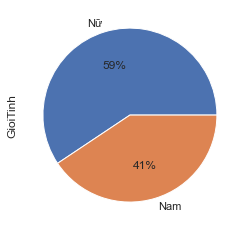

In [187]:
df1["GioiTinh"].value_counts().plot(kind='pie',autopct='%1.0f%%')

Có thể Thử dùng Widgets visualizaton - Nhưng chưa có thời gian

### Quan sát bảng 2 - sale

In [188]:
df2.head(5)

,CustomerID,OrderID,Channel,PaymentType,Brand,Shop,Promotion,SalePrice,SaleDate,Reference
0,CTM012,OTS015,Online,Thẻ,LenovoX1,Phong Vũ,Không,27000000.0,2020-04-23 00:00:00,NaN
1,CTM10164,OTS831,Offline,Tiền mặt,Apple,Viettel Store,Không,3020000.0,2020-08-03 00:00:00,Nhân viên cửa hàng bán Laptop
2,CTM10246,OTS293,Offline,Tiền mặt,Dell,FPT Shop,Có,18310000.0,2020-10-09 00:00:00,"Nhân viên cửa hàng bán Laptop, Mạng xã hội, We..."
3,CTM1028,OTS34756,Offline,Tiền mặt,MSI,Phong Vũ,Không,12203000.0,2020-05-24 00:00:00,"Thông qua người thân, bạn bè, Nhân viên cửa hà..."
4,CTM1028,OTS1044,Offline,Tiền mặt,Asus,Thế giới di động,Có,13070000.0,2020-10-08 00:00:00,Nhờ người có chuyên môn tư vấn


In [189]:
df2.describe()

,SalePrice
count,1.559000e+03
mean,1.208490e+07
std,5.459184e+06
min,1.008000e+03
25%,1.033500e+07
50%,1.246000e+07
75%,1.471450e+07
max,2.700000e+07


In [190]:
df1.shape[0]

1100

In [191]:
df2.shape[0]

1566

=> Dữ liệu bảng 2 nhiều số dòng hơn do 1 customer có thể mua nhiều lần,. cũng có thể dữ liệu thừa, hoặc không match (không có customerID tương ứng)

In [192]:
df2[5:10]

,CustomerID,OrderID,Channel,PaymentType,Brand,Shop,Promotion,SalePrice,SaleDate,Reference
5,CTM1028,OTS40774,Offline,Tiền mặt,Acer,Phong Vũ,Không,10172000.0,2020-12-10 00:00:00,"Thông qua người thân, bạn bè, Nhân viên cửa hà..."
6,CTM1028,OTS92355,Online,Thẻ,Acer,Viễn thông A,Không,20013000.0,2020-12-26 00:00:00,"Thông qua người thân, bạn bè, Nhờ người có chu..."
7,CTM10516,OTS37995,Offline,Thẻ,MSI,Techcare,Không,3232000.0,2020-01-09 00:00:00,"Thông qua người thân, bạn bè, Nhân viên cửa hà..."
8,CTM10516,OTS842,Online,Thẻ,Asus,Điện máy xanh,Không,19950000.0,2020-09-24 00:00:00,"Thông qua người thân, bạn bè, Nhờ người có chu..."
9,CTM10573,OTS67163,Online,Thẻ,HP,Techcare,Không,2139.0,2020-02-22 00:00:00,"Thông qua người thân, bạn bè, Nhờ người có chu..."


Xuất hiện 2 vấn đề dữ liệu có $ và nan

**Check missing value/ null value**

In [193]:
import seaborn as sns
sns.set(style="whitegrid")
# plt.style.use('white')
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
colormap = sns.diverging_palette(220, 10, as_cmap=True)

<AxesSubplot:>

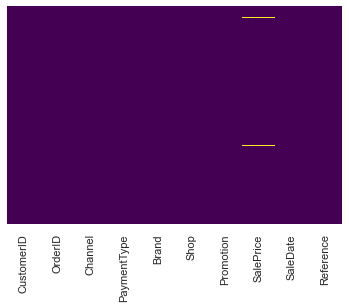

In [194]:
sns.heatmap(df2.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

In [195]:
#Check nan các cột:
lst = list(df2.columns)
lst

['CustomerID',
 'OrderID',
 'Channel',
 'PaymentType',
 'Brand',
 'Shop',
 'Promotion',
 'SalePrice',
 'SaleDate',
 'Reference']

In [196]:
for i in lst:
    NaN = df2[i].isna().sum()
    print(f"{i} - Sum NaN: {NaN}")

CustomerID - Sum NaN: 3
OrderID - Sum NaN: 7
Channel - Sum NaN: 3
PaymentType - Sum NaN: 2
Brand - Sum NaN: 2
Shop - Sum NaN: 5
Promotion - Sum NaN: 0
SalePrice - Sum NaN: 7
SaleDate - Sum NaN: 0
Reference - Sum NaN: 5


## 3. Ideal Clean <a class="anchor" id="B3"></a>
### Xử lý dữ liệu mất mát, dữ liệu thừa, thông tin không cần thiết

Khi quan sát xong cơ bản về dữ liệu chúng tôi có phân tích và xử lý dữ liệu để xử dụng như sau

CustomerID (Drop Row)

- Mối tương quan giữa customerID và OrderID hay giao dịch gần như không quá mạnh, nhưng vẫn có thể dẫn đến mất mát thông tin quý giá => Thêm ID mới không ảnh hưởng đến dữ liệu - Tức là ID có tính duy nhất, việc này sẽ tốt hơn là drop

- Những cái ID này có thể ảnh hưởng khi merge bảng => Tức là thông tin gần như không giá trị, không có thông tin khách hàng rồi, ảnh hưởng đến doanh thu doanh số :))

- Ngó qua 2 cái không phải người mua nhiều nhất => drop tốt

OrderID (Drop col)

- Trường OrderID khó xác định giao dịch và thông tin không quá hữu ích đối với bài toán hiện có không liên quan chặt chẽ đến số giao dịch, có thể sài key shop thêm với OrderID để phân biệt nhưng không cần thiết

Channel (Random: Online Offline)
- all online

PaymentType (Xác suất)
- all thẻ

Brand: (Xác suất)
- Nhãn hiệu nhiều nhất - asus
(Có thể xem mức độ tương quan 2 trường này mà khó xem vãi có phải tuyến tính đâu mà nó gồm nhiều hãng chứ không có tính tăng dần)

Shop - Sum NaN: 5 (Xác suất)
- Điền theo shop nhiều nhất

SalePrice - Sum NaN: 7 (Xác suất)
- Cái này khó điền: Điền theo giá trung bình sản phẩm

Reference - Sum NaN: 5  (Xác suất)
- Điền theo cái xuất hiện nhiều nhất

In [197]:
# tại 1 vị trí tiền đô
(df2["SalePrice"][9])

2139.0

In [198]:
# df2[5:11]

Xem xét thông tin chung cột sale

In [199]:
list_of_col2 = list(df2.columns)
for i in list_of_col2:
    print("Thong tin cot {} :".format(i))
    print()
    print(df2[i].value_counts())
    print('='*40)

Thong tin cot CustomerID :

CTM62896    5
CTM6867     5
CTM35887    4
CTM12627    4
CTM95918    4
           ..
CTM48651    1
CTM48664    1
CTM48793    1
CTM48861    1
CTM67995    1
Name: CustomerID, Length: 1101, dtype: int64
Thong tin cot OrderID :

OTS128      2
OTS98674    2
OTS505      2
OTS985      2
OTS986      2
           ..
OTS20509    1
OTS721      1
OTS90       1
OTS488      1
OTS373      1
Name: OrderID, Length: 1544, dtype: int64
Thong tin cot Channel :

Offline    785
Online     778
Name: Channel, dtype: int64
Thong tin cot PaymentType :

Thẻ         1180
Tiền mặt     384
Name: PaymentType, dtype: int64
Thong tin cot Brand :

Asus         402
Dell         349
HP           269
Acer         182
Apple        143
MSI          133
Lenovo        57
Microsoft     27
LenovoX1       1
DellXPS        1
Name: Brand, dtype: int64
Thong tin cot Shop :

FPT Shop               293
Thế giới di động       262
Điện máy xanh          179
Phong Vũ               167
Viễn thông A           16

In [200]:
### số lượng khách hàng mua laptop group theo số lượng mua 5,4,3,2,1 mua 5 laptop có bao nhiêu
list(df2["CustomerID"].value_counts())[:15]

[5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3]

In [201]:
# dem so luong laptop mua theo so luong dung counter
list1 = list(df2["CustomerID"].value_counts())
from collections import Counter
print(Counter(list1))

Counter({1: 723, 2: 310, 3: 54, 4: 12, 5: 2})


In [202]:
type(df2[i].value_counts())

pandas.core.series.Series

Quy 2 loại tiền USD và VND về VND

In [203]:
# drop nan
df2[df2.SalePrice.isnull()]

,CustomerID,OrderID,Channel,PaymentType,Brand,Shop,Promotion,SalePrice,SaleDate,Reference
80,CTM14053,OTS3620,Offline,Tiền mặt,MSI,Nguyễn Kim,Không,NaN,2020-12-03 00:00:00,Nhờ người có chuyên môn tư vấn
657,CTM48330,OTS56518,Offline,Thẻ,Acer,Viễn thông A,Không,NaN,2020-11-30 00:00:00,"Thông qua người thân, bạn bè, Nhờ người có chu..."
720,CTM52387,OTS19956,Offline,Thẻ,MSI,Techcare,Có,NaN,2020-04-28 00:00:00,"Thông qua người thân, bạn bè, Nhân viên cửa hà..."
1002,CTM67934,OTS32694,Offline,Thẻ,MSI,Phong Vũ,Không,NaN,2020-10-24 00:00:00,"Thông qua người thân, bạn bè, Nhân viên cửa hà..."
1050,CTM70499,OTS20395,Offline,Thẻ,Asus,Viễn thông A,Có,NaN,2020-06-11 00:00:00,"Nhờ người có chuyên môn tư vấn, Mạng xã hội"
1092,CTM74077,OTS8049,Offline,Thẻ,Asus,Techcare,Có,NaN,2020-09-07 00:00:00,"Thông qua người thân, bạn bè, Nhân viên cửa hà..."
1557,NaN,OTS1000,Offline,Tiền mặt,Dell,Điện máy xanh,Có,NaN,2020-02-17 00:00:00,NaN


In [204]:
# list Quan sát sale bị mất thông tin sale price
df_Sale_Price_Is_NaN = df2[df2.SalePrice.isnull()]

In [205]:
# list to drop
df_Sale_Price_Is_NaN.index.values.tolist()

[80, 657, 720, 1002, 1050, 1092, 1557]

In [206]:
# drop by index row
# l = df_Sale_Price_Is_NaN.index.values.tolist()
rows = df2.index[[80, 657, 720, 1002, 1050, 1092, 1557]]
df2.drop(rows, inplace=True)

In [207]:
#1566 -> 1559 giảm đi 7
df2.shape

(1559, 10)

In [208]:
df2[df2.SalePrice.isnull()]

,CustomerID,OrderID,Channel,PaymentType,Brand,Shop,Promotion,SalePrice,SaleDate,Reference


In [209]:
# string to int

df2[df2.columns[7]] = df2[df2.columns[7]].apply(lambda x: int(x))

In [210]:
df2.SalePrice

0       27000000
1        3020000
2       18310000
3       12203000
4       13070000
          ...   
1561    12510000
1562     7400000
1563    15440000
1564    11530000
1565    14170000
Name: SalePrice, Length: 1559, dtype: int64

In [211]:
df2.SalePrice.min()

1008

In [212]:
df2[df2.columns[7]] = df2[df2.columns[7]].apply(lambda x: x*23000 if x < 9000 else x )

In [213]:
df2.SalePrice

0       27000000
1        3020000
2       18310000
3       12203000
4       13070000
          ...   
1561    12510000
1562     7400000
1563    15440000
1564    11530000
1565    14170000
Name: SalePrice, Length: 1559, dtype: int64

In [214]:
# giá tiền trung bình 15tr
df2.SalePrice.mean()/1000000

15.815076972418217

In [215]:
# df2['SalePrice'].mean()

In [216]:
mean_price = df2['SalePrice'].mean()
mean_price

15815076.972418217

In [217]:
df2['SalePrice'].max()

68977000

<AxesSubplot:ylabel='Channel'>

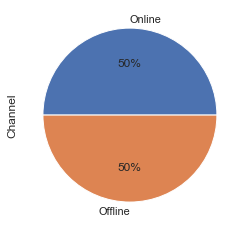

In [218]:
df2["Channel"].value_counts().plot(kind="pie",autopct="%1.0f%%")

<AxesSubplot:ylabel='PaymentType'>

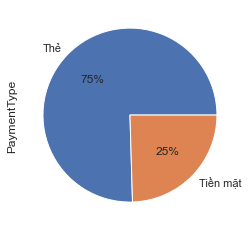

In [219]:
df2["PaymentType"].value_counts().plot(kind="pie",autopct="%1.0f%%")

<AxesSubplot:ylabel='Brand'>

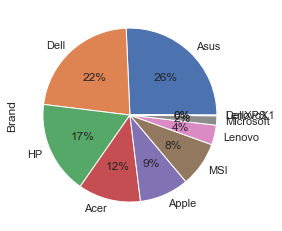

In [220]:
df2["Brand"].value_counts().plot(kind="pie",autopct="%1.0f%%")

<AxesSubplot:ylabel='Shop'>

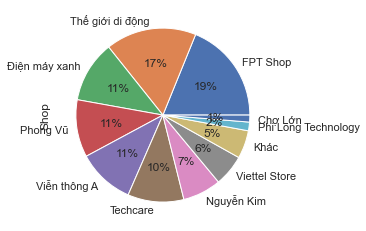

In [221]:
df2["Shop"].value_counts().plot(kind="pie",autopct="%1.0f%%")

<AxesSubplot:ylabel='Promotion'>

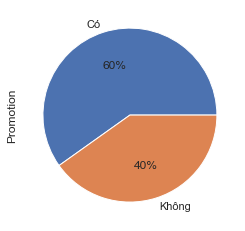

In [222]:
df2["Promotion"].value_counts().plot(kind="pie",autopct="%1.0f%%")

## C. Data Preparation <a class="anchor" id="C"></a>

## 1. Handle Missing Value <a class="anchor" id="C1"></a>

Nhiệm vụ này chúng tôi xử dụng các nghiệp vụ sau:

- Tại bảng2 (bảng Sale):

- Xử lý 31 row có chứa NaN

- Xử lý dữ liệu ngày

- Drop col orderID (lý do drop trường orderID chúng tôi đã nêu ở Ideal Clean)

- Merge 2 table

- Xem xét NaN => Xử lý tiếp

- Crosstable

In [223]:
df2.head()

,CustomerID,OrderID,Channel,PaymentType,Brand,Shop,Promotion,SalePrice,SaleDate,Reference
0,CTM012,OTS015,Online,Thẻ,LenovoX1,Phong Vũ,Không,27000000,2020-04-23 00:00:00,NaN
1,CTM10164,OTS831,Offline,Tiền mặt,Apple,Viettel Store,Không,3020000,2020-08-03 00:00:00,Nhân viên cửa hàng bán Laptop
2,CTM10246,OTS293,Offline,Tiền mặt,Dell,FPT Shop,Có,18310000,2020-10-09 00:00:00,"Nhân viên cửa hàng bán Laptop, Mạng xã hội, We..."
3,CTM1028,OTS34756,Offline,Tiền mặt,MSI,Phong Vũ,Không,12203000,2020-05-24 00:00:00,"Thông qua người thân, bạn bè, Nhân viên cửa hà..."
4,CTM1028,OTS1044,Offline,Tiền mặt,Asus,Thế giới di động,Có,13070000,2020-10-08 00:00:00,Nhờ người có chuyên môn tư vấn


In [224]:
df2[df2.isna().any(axis=1)]

,CustomerID,OrderID,Channel,PaymentType,Brand,Shop,Promotion,SalePrice,SaleDate,Reference
0,CTM012,OTS015,Online,Thẻ,LenovoX1,Phong Vũ,Không,27000000,2020-04-23 00:00:00,NaN
10,CTM10573,OTS51473,Online,Thẻ,Acer,NaN,Có,13513000,2020-03-10 00:00:00,"Thông qua người thân, bạn bè, Nhờ người có chu..."
45,CTM1234,OTS12,Online,Thẻ,DellXPS,FPT Shop,Không,15500000,2020-06-05 00:00:00,NaN
48,CTM12491,OTS512,Offline,Thẻ,NaN,Thế giới di động,Không,14700000,2020-12-10 00:00:00,"Thông qua người thân, bạn bè, Nhân viên cửa hà..."
90,CTM14696,NaN,Offline,Tiền mặt,MSI,Techcare,Có,9852000,2020-04-24 00:00:00,"Thông qua người thân, bạn bè, Nhờ người có chu..."
150,CTM18644,OTS30795,Online,Thẻ,Asus,NaN,Có,13105000,2020-06-14 00:00:00,"Thông qua người thân, bạn bè, Nhân viên cửa hà..."
185,CTM20230,OTS308,Online,Thẻ,Apple,Viettel Store,Có,33787000,2020-05-05 00:00:00,NaN
241,CTM23314,NaN,Offline,Tiền mặt,HP,Phong Vũ,Có,11107000,2020-10-03 00:00:00,"Thông qua người thân, bạn bè"
455,CTM36874,OTS38995,Online,Thẻ,HP,NaN,Có,12742000,2020-09-01 00:00:00,"Nhờ người có chuyên môn tư vấn, Nhân viên cửa ..."
540,CTM41481,OTS1061,Online,Thẻ,Asus,NaN,Không,19880000,2020-12-07 00:00:00,"Nhờ người có chuyên môn tư vấn, Nhân viên cửa ..."


In [225]:
# Số ô NaN
df_NaN = df2[df2.isna().any(axis=1)]
df_NaN.shape[0]

24

### xử lý nan dựa trên ideal clean ở trên

In [226]:
# df2 = df2[df2['CustomerID'].notna()] # drop customerID with NaN
# df.drop(df.columns["OrderID"],axis=1,inplace=True)
df2.drop(columns=["OrderID"],axis=1,inplace=True)
df2["Channel"].fillna('Online', inplace=True)
df2["PaymentType"].fillna('Thẻ', inplace=True)
df2["Brand"].fillna('Asus', inplace=True)
df2["Shop"].fillna('FPT Shop', inplace=True)
df2["SalePrice"].fillna(mean_price, inplace=True)
df2["Reference"].fillna("Thông qua người thân, bạn bè, Nhân viên cửa hàng bán Laptop", inplace=True)

In [227]:
df_NaN = df2[df2.isna().any(axis=1)]
df_NaN.shape[0]

2

In [228]:
df2[df2.isna().any(axis=1)]

,CustomerID,Channel,PaymentType,Brand,Shop,Promotion,SalePrice,SaleDate,Reference
1558,NaN,Online,Thẻ,Asus,Điện máy xanh,Không,18600000,2020-12-21 00:00:00,Nhân viên cửa hàng bán Laptop
1559,NaN,Online,Thẻ,HP,Viễn thông A,Không,37743000,2020-12-25 00:00:00,"Thông qua người thân, bạn bè, Nhân viên cửa hà..."


In [229]:
df2 = df2.drop([1564,1565])

In [230]:
df2[df2.isna().any(axis=1)]

,CustomerID,Channel,PaymentType,Brand,Shop,Promotion,SalePrice,SaleDate,Reference
1558,NaN,Online,Thẻ,Asus,Điện máy xanh,Không,18600000,2020-12-21 00:00:00,Nhân viên cửa hàng bán Laptop
1559,NaN,Online,Thẻ,HP,Viễn thông A,Không,37743000,2020-12-25 00:00:00,"Thông qua người thân, bạn bè, Nhân viên cửa hà..."


In [231]:
df_NaN = df2[df2.isna().any(axis=1)]
df_NaN.shape[0]

2

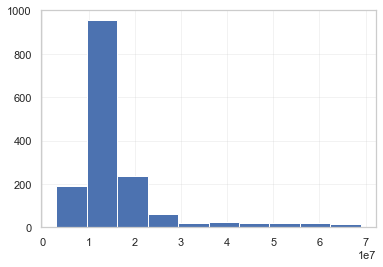

In [232]:
# Phan phoi gia +> tap trung nhieu o 10 tr
plt.hist(df2["SalePrice"], bins=10)
plt.show()

## 2. Merge Two Table<a class="anchor" id="C2"></a>

In [233]:
df2

,CustomerID,Channel,PaymentType,Brand,Shop,Promotion,SalePrice,SaleDate,Reference
0,CTM012,Online,Thẻ,LenovoX1,Phong Vũ,Không,27000000,2020-04-23 00:00:00,"Thông qua người thân, bạn bè, Nhân viên cửa hà..."
1,CTM10164,Offline,Tiền mặt,Apple,Viettel Store,Không,3020000,2020-08-03 00:00:00,Nhân viên cửa hàng bán Laptop
2,CTM10246,Offline,Tiền mặt,Dell,FPT Shop,Có,18310000,2020-10-09 00:00:00,"Nhân viên cửa hàng bán Laptop, Mạng xã hội, We..."
3,CTM1028,Offline,Tiền mặt,MSI,Phong Vũ,Không,12203000,2020-05-24 00:00:00,"Thông qua người thân, bạn bè, Nhân viên cửa hà..."
4,CTM1028,Offline,Tiền mặt,Asus,Thế giới di động,Có,13070000,2020-10-08 00:00:00,Nhờ người có chuyên môn tư vấn
...,...,...,...,...,...,...,...,...,...
1559,NaN,Online,Thẻ,HP,Viễn thông A,Không,37743000,2020-12-25 00:00:00,"Thông qua người thân, bạn bè, Nhân viên cửa hà..."
1560,CTM28612,Offline,Tiền mặt,HP,Phong Vũ,Có,12981000,2020-03-02 00:00:00,Nhờ người có chuyên môn tư vấn
1561,CTM36125,Online,Thẻ,Dell,FPT Shop,Không,12510000,9/31/2020,"Thông qua người thân, bạn bè"
1562,CTM57399,Online,Thẻ,Asus,Nguyễn Kim,Có,7400000,2020-06-25 00:00:00,Nhân viên cửa hàng bán Laptop


In [234]:
df1

,KH_ID,GioiTinh,QueQuan,NamHocThu,ChuyenNganh,NgheNghiepGiaDinh,ChiTieuHangThang,ThoiGianSuDung,MucDichSuDungLaptop,MucDoHaiLong,YeuToThuongHieuSP,YeuToCauHinh,YeuToTocDoXuLy,YeuToGia,YeuToThietKe,YeuToUyTinNhaBanle,YeuToBaoMat,YeuToBaoHanh,YeuToKhuyenMai
0,CTM10164,Nam,Quảng Trị,Năm 2,Luật kinh tế,Nông dân,Từ 1.500.000 đến 3.000.000,Từ 6 tháng - 1 năm,"Học tập, Làm việc, Chơi game, Giải trí (xem ph...",5,3,3,3,3,3,3,3,3,3
1,CTM10246,Nam,Đà Nẵng,Năm 4,Hệ thống thông tin quản lý,Kinh doanh tự do,Từ 3.000.000 đến 5.000.000,Trên 2 năm,"Học tập, Làm việc, Chơi game",4,4,5,5,4,3,4,1,5,5
2,CTM1028,Nữ,Nghệ An,Năm 3,Thương mại điện tử,Nông dân,Từ 1.500.000 đến 3.000.000,Trên 2 năm,"Học tập, Làm việc",4,4,3,4,4,3,4,2,4,4
3,CTM10516,Nam,Gia Lai,Năm 2,Thương mại,Nông dân,Từ 1.500.000 đến 3.000.000,Từ 1 năm đến 2 năm,"Học tập, Làm việc, Giải trí (xem phim, nghe nh...",4,3,4,4,3,2,3,3,4,2
4,CTM10573,Nam,Thừa Thiên Huế,Năm 4,Tài chính doanh nghiệp,Nông dân,Từ 1.500.000 đến 3.000.000,Trên 2 năm,"Học tập, Làm việc",3,3,4,3,4,1,4,1,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,CTM99547,Nam,Quảng Trị,Năm 1,Hệ thống thông tin quản lý,Nông dân,Từ 1.500.000 đến 3.000.000,Dưới 6 tháng,"Học tập, Chơi game, Giải trí (xem phim, nghe n...",4,2,5,5,4,2,2,1,3,4
1096,CTM9971,Nữ,Hồ Chí Minh,Năm 3,Kế toán,Nông dân,Dưới 1.500.000,Từ 6 tháng - 1 năm,"Học tập, Làm việc, Giải trí (xem phim, nghe nh...",4,3,5,5,4,4,5,3,4,4
1097,CTM99751,Nữ,Bình Định,Năm 1,Quản trị khách sạn,Nhân viên văn phòng,Từ 1.500.000 đến 3.000.000,Từ 6 tháng - 1 năm,"Giải trí (xem phim, nghe nhạc, lướt web)",4,4,4,4,4,4,4,4,4,4
1098,CTM99852,Nữ,Bình Định,Năm 4,Quản trị kinh doanh,Nông dân,Trên 5.000.000,Trên 2 năm,"Học tập, Làm việc",4,3,4,4,3,3,3,3,3,3


In [235]:
df1 = df1.rename({'KH_ID': 'CustomerID'}, axis=1)  # new method
df2.head(1)

,CustomerID,Channel,PaymentType,Brand,Shop,Promotion,SalePrice,SaleDate,Reference
0,CTM012,Online,Thẻ,LenovoX1,Phong Vũ,Không,27000000,2020-04-23 00:00:00,"Thông qua người thân, bạn bè, Nhân viên cửa hà..."


In [236]:
df3 = pd.merge(df1, df2, on="CustomerID")

In [237]:
df3.describe()

,MucDoHaiLong,YeuToThuongHieuSP,YeuToCauHinh,YeuToTocDoXuLy,YeuToGia,YeuToThietKe,YeuToUyTinNhaBanle,YeuToBaoMat,YeuToBaoHanh,YeuToKhuyenMai,SalePrice
count,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1.558000e+03
mean,3.810655,3.591784,3.475610,3.761874,3.857510,3.367779,3.608472,3.027599,3.890886,3.842747,1.578987e+07
std,0.841728,0.933352,1.032725,0.875212,0.780448,1.070496,0.969400,1.050985,0.824111,0.895458,1.039039e+07
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.020000e+06
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,1.110050e+07
50%,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,4.000000,1.315000e+07
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.655000e+07
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,6.897700e+07


In [238]:
df_NaN = df3[df3.isna().any(axis=1)]
df_NaN.shape[0]

0

Không có nan

In [239]:
df3.head(5)

,CustomerID,GioiTinh,QueQuan,NamHocThu,ChuyenNganh,NgheNghiepGiaDinh,ChiTieuHangThang,ThoiGianSuDung,MucDichSuDungLaptop,MucDoHaiLong,...,YeuToBaoHanh,YeuToKhuyenMai,Channel,PaymentType,Brand,Shop,Promotion,SalePrice,SaleDate,Reference
0,CTM10164,Nam,Quảng Trị,Năm 2,Luật kinh tế,Nông dân,Từ 1.500.000 đến 3.000.000,Từ 6 tháng - 1 năm,"Học tập, Làm việc, Chơi game, Giải trí (xem ph...",5,...,3,3,Offline,Tiền mặt,Apple,Viettel Store,Không,3020000,2020-08-03 00:00:00,Nhân viên cửa hàng bán Laptop
1,CTM10246,Nam,Đà Nẵng,Năm 4,Hệ thống thông tin quản lý,Kinh doanh tự do,Từ 3.000.000 đến 5.000.000,Trên 2 năm,"Học tập, Làm việc, Chơi game",4,...,5,5,Offline,Tiền mặt,Dell,FPT Shop,Có,18310000,2020-10-09 00:00:00,"Nhân viên cửa hàng bán Laptop, Mạng xã hội, We..."
2,CTM1028,Nữ,Nghệ An,Năm 3,Thương mại điện tử,Nông dân,Từ 1.500.000 đến 3.000.000,Trên 2 năm,"Học tập, Làm việc",4,...,4,4,Offline,Tiền mặt,MSI,Phong Vũ,Không,12203000,2020-05-24 00:00:00,"Thông qua người thân, bạn bè, Nhân viên cửa hà..."
3,CTM1028,Nữ,Nghệ An,Năm 3,Thương mại điện tử,Nông dân,Từ 1.500.000 đến 3.000.000,Trên 2 năm,"Học tập, Làm việc",4,...,4,4,Offline,Tiền mặt,Asus,Thế giới di động,Có,13070000,2020-10-08 00:00:00,Nhờ người có chuyên môn tư vấn
4,CTM1028,Nữ,Nghệ An,Năm 3,Thương mại điện tử,Nông dân,Từ 1.500.000 đến 3.000.000,Trên 2 năm,"Học tập, Làm việc",4,...,4,4,Offline,Tiền mặt,Acer,Phong Vũ,Không,10172000,2020-12-10 00:00:00,"Thông qua người thân, bạn bè, Nhân viên cửa hà..."


In [240]:
df3.shape

(1558, 27)

In [241]:
# df3.to_csv("DataSetVer4.csv",index=False,encoding='utf-8-sig')

#### Số khách hàng, số giao dịch, doanh thu tháng

In [242]:
# số khách hàng
df3['CustomerID'].nunique()

1098

In [243]:
# số giao dịch
df3['CustomerID'].count()

1558

In [244]:
# Doanh thu năm
df3['SalePrice'].sum()

24600618000

#### Chuẩn hoá: Xử lý các kiểu thời gian về cùng 1 loại

Dữ liệu về lỗi ngày 31 tháng 02 hay năm 1990 đã được chuẩn hoá

Dữ liệu có kiểu ngày tháng và tháng ngày => Được xử lý như bên dưới

In [245]:
s = df3.SaleDate
type(s)

pandas.core.series.Series

In [246]:
pd.to_datetime(s, format="%Y-%d-%m", errors="coerce")

0      NaT
1      NaT
2      NaT
3      NaT
4      NaT
        ..
1553   NaT
1554   NaT
1555   NaT
1556   NaT
1557   NaT
Name: SaleDate, Length: 1558, dtype: datetime64[ns]

In [247]:
pd.to_datetime(s, format="%Y-%m-%d", errors="coerce")

0      2020-08-03
1      2020-10-09
2      2020-05-24
3      2020-10-08
4      2020-12-10
          ...    
1553   2020-01-14
1554   2020-10-02
1555   2020-10-31
1556   2020-01-11
1557   2020-12-26
Name: SaleDate, Length: 1558, dtype: datetime64[ns]

In [248]:
# Các kiểu dữ liệu được đưa về năm tháng ngày
pd.to_datetime(s, format="%Y-%d-%m", errors="coerce").fillna(pd.to_datetime(s, format="%Y-%m-%d", errors="coerce"))

0      2020-08-03
1      2020-10-09
2      2020-05-24
3      2020-10-08
4      2020-12-10
          ...    
1553   2020-01-14
1554   2020-10-02
1555   2020-10-31
1556   2020-01-11
1557   2020-12-26
Name: SaleDate, Length: 1558, dtype: datetime64[ns]

In [249]:
df3.SaleDate = pd.to_datetime(s, format="%Y-%d-%m", errors="coerce").fillna(pd.to_datetime(s, format="%Y-%m-%d", errors="coerce"))

In [250]:
# df3.to_csv("DataSetVer5.csv",index=False,encoding='utf-8-sig')

In [251]:
df3.columns

Index(['CustomerID', 'GioiTinh', 'QueQuan', 'NamHocThu', 'ChuyenNganh',
       'NgheNghiepGiaDinh', 'ChiTieuHangThang', 'ThoiGianSuDung',
       'MucDichSuDungLaptop', 'MucDoHaiLong', 'YeuToThuongHieuSP',
       'YeuToCauHinh', 'YeuToTocDoXuLy', 'YeuToGia', 'YeuToThietKe',
       'YeuToUyTinNhaBanle', 'YeuToBaoMat', 'YeuToBaoHanh', 'YeuToKhuyenMai',
       'Channel', 'PaymentType', 'Brand', 'Shop', 'Promotion', 'SalePrice',
       'SaleDate', 'Reference'],
      dtype='object')

In [252]:
# type(df2[i].value_counts())

In [253]:
# # dem so luong laptop mua theo so luong dung counter
# list1 = list(df3["CustomerID"].value_counts())
# from collections import Counter
# print(Counter(list1))
# type(df3[i].value_counts())

In [254]:
# ![image.png](attachment:image.png)

## D. Modeling  <a class="anchor" id="D"></a>

In [255]:
!pip install word2number

In [256]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from word2number import w2n

## 1.  Select And Prepair Feature And Target For Model:<a class="anchor" id="D1"></a>

In [257]:
#data_for_training_model 
d = df3[['GioiTinh', 'NamHocThu', 'ChiTieuHangThang', 'ThoiGianSuDung', 'MucDichSuDungLaptop', 'SalePrice']]
d.head()

,GioiTinh,NamHocThu,ChiTieuHangThang,ThoiGianSuDung,MucDichSuDungLaptop,SalePrice
0,Nam,Năm 2,Từ 1.500.000 đến 3.000.000,Từ 6 tháng - 1 năm,"Học tập, Làm việc, Chơi game, Giải trí (xem ph...",3020000
1,Nam,Năm 4,Từ 3.000.000 đến 5.000.000,Trên 2 năm,"Học tập, Làm việc, Chơi game",18310000
2,Nữ,Năm 3,Từ 1.500.000 đến 3.000.000,Trên 2 năm,"Học tập, Làm việc",12203000
3,Nữ,Năm 3,Từ 1.500.000 đến 3.000.000,Trên 2 năm,"Học tập, Làm việc",13070000
4,Nữ,Năm 3,Từ 1.500.000 đến 3.000.000,Trên 2 năm,"Học tập, Làm việc",10172000


In [258]:
raw_dataset = d

In [259]:

nominal_cols = ['GioiTinh', 'NamHocThu', 'ChiTieuHangThang', 'ThoiGianSuDung']
encoded_df = raw_dataset.copy()

for col in nominal_cols:

    encoder = LabelEncoder()
    encoded_df[col] = encoder.fit_transform(raw_dataset[col])

In [260]:
new_ds = encoded_df.drop('MucDichSuDungLaptop', axis=1) 
new_ds

,GioiTinh,NamHocThu,ChiTieuHangThang,ThoiGianSuDung,SalePrice
0,0,1,2,3,3020000
1,0,3,3,1,18310000
2,1,2,2,1,12203000
3,1,2,2,1,13070000
4,1,2,2,1,10172000
...,...,...,...,...,...
1553,1,0,2,3,15500000
1554,1,3,1,1,11539000
1555,1,3,1,1,21200000
1556,1,0,2,3,4248000


In [261]:
purposes = raw_dataset['MucDichSuDungLaptop']

new_purpose = {"Hoc_tap":[], "Lam_viec":[], "Choi_game":[], "Giai_tri":[], "Khac":[]}

for purpose in purposes:

    current_pp = [0,0,0,0,0]
    if "Học tập" in purpose: current_pp[0]+=1
    if "Làm việc" in purpose: current_pp[1]+=1
    if "Chơi game" in purpose: current_pp[2]+=1
    if "Giải trí" in purpose: current_pp[3]+=1
    if "Khác" in purpose: current_pp[4]+=1
    
    new_purpose["Hoc_tap"].append(current_pp[0])
    new_purpose["Lam_viec"].append(current_pp[1])
    new_purpose["Choi_game"].append(current_pp[2])
    new_purpose["Giai_tri"].append(current_pp[3])
    new_purpose["Khac"].append(current_pp[4])

newpp = pd.DataFrame(new_purpose)
newpp.index = raw_dataset.index

In [262]:
newpp

,Hoc_tap,Lam_viec,Choi_game,Giai_tri,Khac
0,1,1,1,1,1
1,1,1,1,0,0
2,1,1,0,0,0
3,1,1,0,0,0
4,1,1,0,0,0
...,...,...,...,...,...
1553,0,0,0,1,0
1554,1,1,0,0,0
1555,1,1,0,0,0
1556,1,1,0,1,0


In [263]:
new_data_Fk = pd.merge(newpp, new_ds, left_index=True, right_index=True)


In [264]:
new_data_Fk

,Hoc_tap,Lam_viec,Choi_game,Giai_tri,Khac,GioiTinh,NamHocThu,ChiTieuHangThang,ThoiGianSuDung,SalePrice
0,1,1,1,1,1,0,1,2,3,3020000
1,1,1,1,0,0,0,3,3,1,18310000
2,1,1,0,0,0,1,2,2,1,12203000
3,1,1,0,0,0,1,2,2,1,13070000
4,1,1,0,0,0,1,2,2,1,10172000
...,...,...,...,...,...,...,...,...,...,...
1553,0,0,0,1,0,1,0,2,3,15500000
1554,1,1,0,0,0,1,3,1,1,11539000
1555,1,1,0,0,0,1,3,1,1,21200000
1556,1,1,0,1,0,1,0,2,3,4248000


In [265]:
new_data_Fk.columns

Index(['Hoc_tap', 'Lam_viec', 'Choi_game', 'Giai_tri', 'Khac', 'GioiTinh',
       'NamHocThu', 'ChiTieuHangThang', 'ThoiGianSuDung', 'SalePrice'],
      dtype='object')

## 2. Training Model:<a class="anchor" id="D2"></a>

In [266]:
# chia tajap duwx lieeju
feature = new_data_Fk[['Hoc_tap', 'Lam_viec', 'Choi_game', 'Giai_tri', 'GioiTinh',
       'NamHocThu', 'ChiTieuHangThang', 'ThoiGianSuDung']]
target = new_data_Fk['SalePrice']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size =0.33)

In [267]:
reg = linear_model.LinearRegression()

In [268]:
# reg.fit(new_data_Fk[['Hoc_tap', 'Lam_viec', 'Choi_game', 'Giai_tri', 'Khac','GioiTinh', 'NamHocThu', 'ChiTieuHangThang', 'ThoiGianSuDung']],new_data_Fk['SalePrice'])
reg.fit(X_train, y_train)

LinearRegression()

In [269]:
reg.score(X_test, y_test)

0.0591804764711239

SalePrice distribution
Mean:0.1936090232514851 Std:0.15753284965221342


<AxesSubplot:>

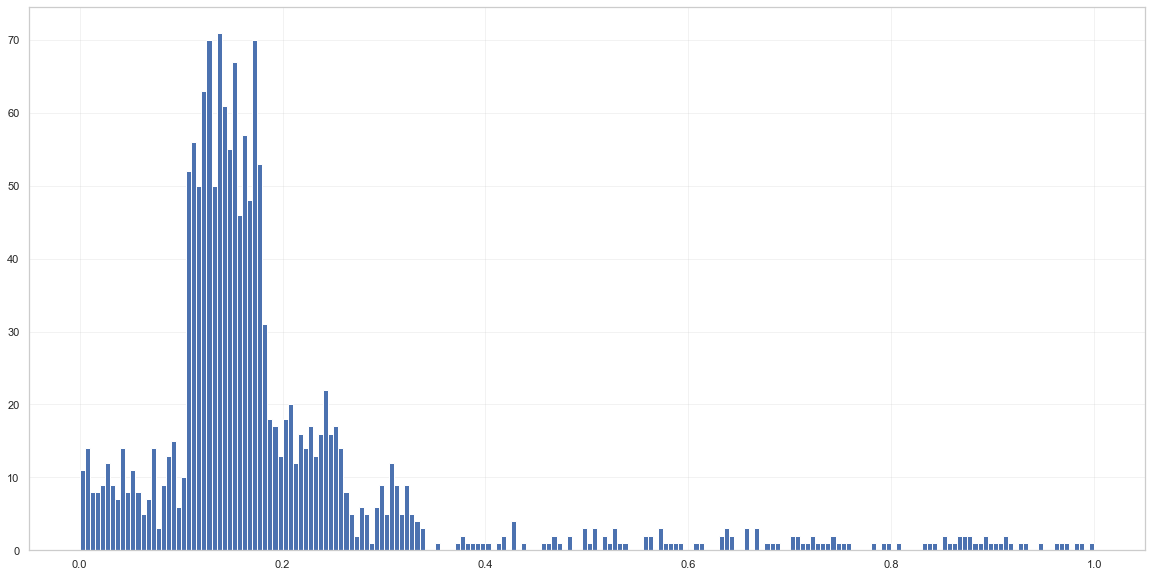

In [270]:
print('SalePrice distribution')
print("Mean:"+str(((target - target.min())/(target.max()-target.min())).mean()),
"Std:"+str(((target - target.min())/(target.max()-target.min())).std()))
((target - target.min())/(target.max()-target.min())).hist(bins=200, figsize=(20,10))

In [271]:
# chia tajap duwx lieeju
feature = new_data_Fk[['GioiTinh', 'Hoc_tap', 'Lam_viec', 'Choi_game',
       'NamHocThu', 'ChiTieuHangThang', 'ThoiGianSuDung']]
target = new_data_Fk['SalePrice']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size =0.2, random_state=10)

In [272]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

Use K Fold cross validation to measure accuracy of our LinearRegression model

In [273]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), feature, target, cv=cv)

array([ 0.03597598,  0.07741916,  0.05095781,  0.05710752, -0.02684985])

Find best model using GridSearchCV

In [274]:
new_data_Fk['NamHocThu'] = [int(data[-1:]) for data in raw_dataset['NamHocThu']]

In [275]:
feature.columns

Index(['GioiTinh', 'Hoc_tap', 'Lam_viec', 'Choi_game', 'NamHocThu',
       'ChiTieuHangThang', 'ThoiGianSuDung'],
      dtype='object')

<AxesSubplot:>

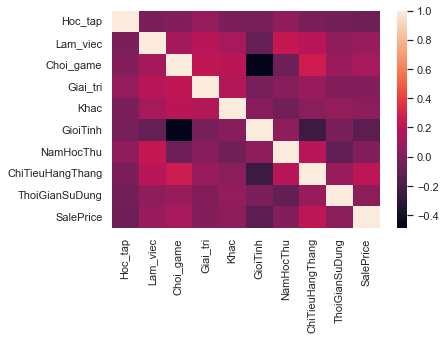

In [276]:
import seaborn

# features linear correlation
seaborn.heatmap(new_data_Fk.corr())

In [277]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }  
        },'SVR': {
            'model': SVR(),
            'params': {
                'kernel': ['linear', 'poly', 'rbf'],
                'gamma': ['scale','auto']
            }},
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        }) 

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(feature, target)

,model,best_score,best_params
0,linear_regression,0.036485,{'normalize': False}
1,lasso,0.036485,"{'alpha': 2, 'selection': 'random'}"
2,SVR,-0.077420,"{'gamma': 'scale', 'kernel': 'poly'}"
3,decision_tree,-0.229865,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [278]:
# df3['SalePrice'].describe()

In [279]:
# plt.hist(list(df3['SalePrice']), bins =6)

In [281]:
# Mn có thể muted nhóm, mình note tạm vài ý lên

# 1. Phần câu 1,2 sẽ cần trình bày lại file JN, xem xét mục tiêu và phân tích ở file báo cáo mức bề mặt và nhận xét cơ bản

# 2. Phần 3,4 là phần predict
# Xây dựng xem xét tối ưu mô hình
# Gán nhãn giá theo mức trung bình, thấp cao
# Có thể dùng bin chia thành 6,7 nhóm

# Dựa vào các thông tin quan trọng của customer để đưa ra gợi ý dùng thuật toán phân loại

# Mình có thể đối chiếu thêm cách phân cụm khách hàng theo chi tiêu hàng tháng (4 class)
# Và theo nghề nghiệp gia đình (4class) 
# Để xem phân bố dữ liệu price và lấy trung bình theo các nhóm

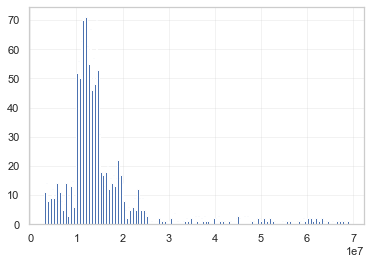

In [282]:
plt.hist(target, bins=200)
plt.show()

Phân chia laptop theo phân khúc:
    
    - thấp Dưới 5 tr
    - trung dưới 10 tr
    - cao dưới 20 tr
    - cao cấp dưới 50tr
https://techzones.vn/cac-laptop-van-phong-tot-nhat-trong-tung-phan-khuc-gia

In [296]:
s= target.tolist()

def counterr(arr,x):
    re =0
    for i in arr:
        if i==x: re+=1
    return re
s1= [0 for i in s if i<5000000 and i>0]
print("So nguoi mua laptop tam thap (duoi5tr)",counterr(s1,0))
s2 = [1 for i in s if i<10000000 and i >=5000000]
print("So nguoi mua laptop tam thap (duoi10tr)",counterr(s2,1))
s3 = [2 for i in s if i<20000000 and i>=10000000]
print("So nguoi mua laptop tam thap (duoi20tr)",counterr(s3,2))
s4= [3 for i in s if i<50000000 and i>=20000000]
print("So nguoi mua laptop tam thap (duoi50tr)",counterr(s4,3))

s5 = [i for i in s if i>=50000000]
# plt.pie(s)
# plt.show() 

So nguoi mua laptop tam thap (duoi5tr) 62
So nguoi mua laptop tam thap (duoi10tr) 139
So nguoi mua laptop tam thap (duoi20tr) 1139
So nguoi mua laptop tam thap (duoi50tr) 171


In [294]:
62+139+1139+171

1511

In [295]:
len(target)

1558

array([[<AxesSubplot:title={'center':'col'}>]], dtype=object)

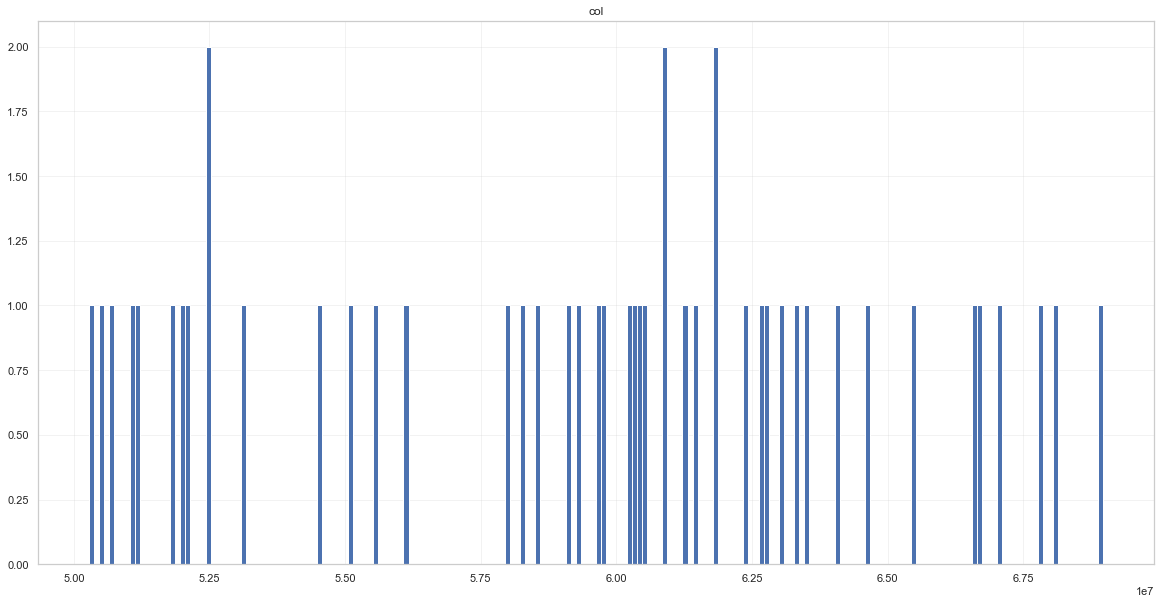

In [304]:
(pd.DataFrame({'col':s5})).hist(bins=200, figsize=(20,10))

In [305]:
1558 - 1511

47

In [306]:
1139/ 1558

0.7310654685494223

### Nhận thấy laptop tầm 10-20 chiếm phần lớn 1139/ 1558 = 70%

### Ta sẽ xem phân phối tầm giá này

array([[<AxesSubplot:title={'center':'col'}>]], dtype=object)

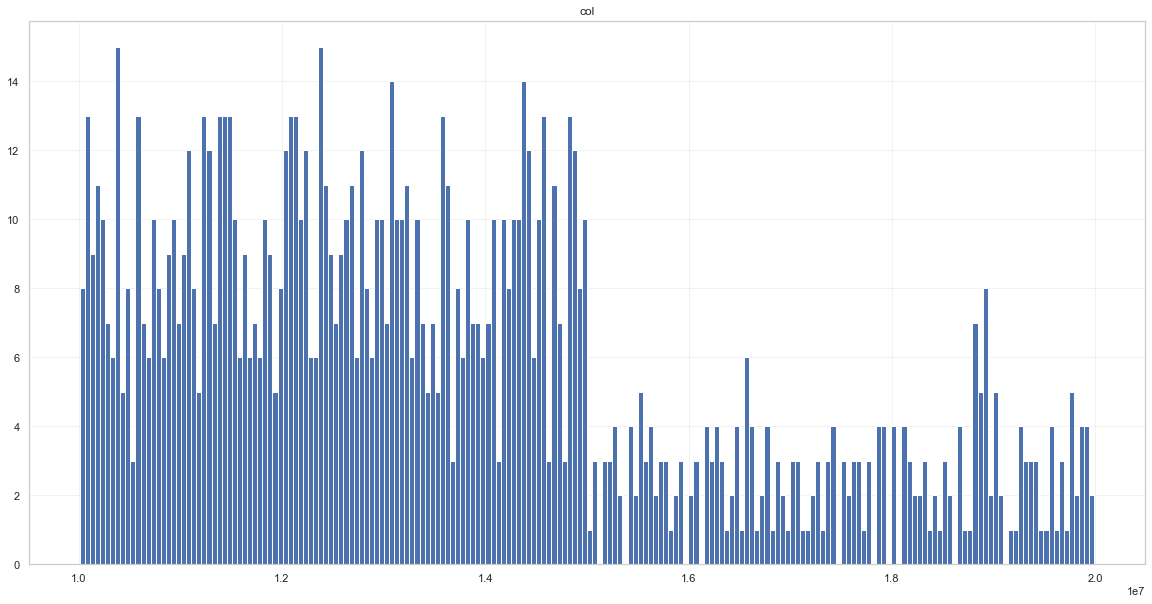

In [308]:
s3 = [i for i in s if i<20000000 and i>=10000000]
(pd.DataFrame({'col':s3})).hist(bins=200, figsize=(20,10))

### Người mua tập trung mua ở mức giá 10-14 triệu và một mức tiếp theo là 15-20 triệu

In [324]:

# Mình có thể đối chiếu thêm cách phân cụm khách hàng theo chi tiêu hàng tháng (4 class)
# Và theo nghề nghiệp gia đình (4class) 
# Để xem phân bố dữ liệu price và lấy trung bình theo các nhóm

array([[<AxesSubplot:title={'center':'col'}>]], dtype=object)

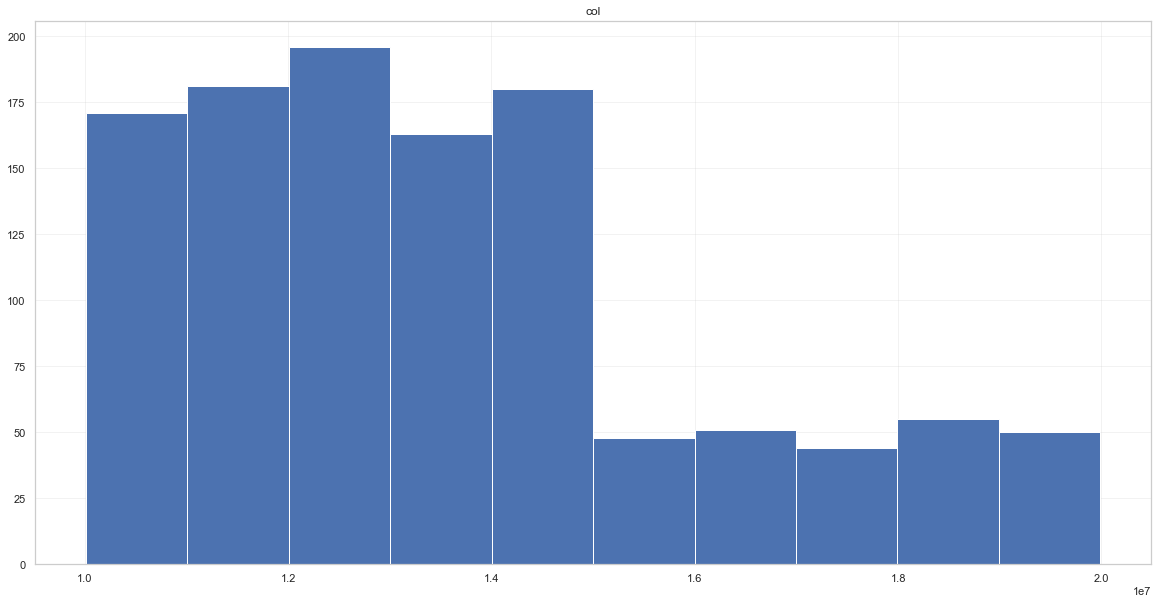

In [309]:
(pd.DataFrame({'col':s3})).hist(figsize=(20,10))

Phía trên ta có thể phân dữ liệu thành 4 nhãn : thấp hơn 5 tr, thấp hơn 10 tr, thấp hơn 20 tr, thấp hơn 50tr và cao hơn 50tr, tuy nhiên ta có thể phân thành 2 nhóm ở khoảng thấp hơn 20 tr là thấp hơn 15 tr và thấp hơn 20tr => Lúc này dùng cây quyết định vào để gợi ý người dùng

Hy vọng vào một kết quả tốt hơn mô hình ở trên

In [311]:
# sử dụng lại new_data fam ở trên gán nhãn lại trường SalePrice
new_data_Fk.head(3)

,Hoc_tap,Lam_viec,Choi_game,Giai_tri,Khac,GioiTinh,NamHocThu,ChiTieuHangThang,ThoiGianSuDung,SalePrice
0,1,1,1,1,1,0,2,2,3,3020000
1,1,1,1,0,0,0,4,3,1,18310000
2,1,1,0,0,0,1,3,2,1,12203000


In [312]:
new_data_for_dt = new_data_Fk # new data frame for decision tree model

def convertt(i):
    # conver_sale_price_to_categorical_data
    if i<5000000:
        return 0
    elif i<10000000 and i >=5000000:
        return 2
    elif i<15000000 and i>=10000000:
        return 3
    elif i<20000000 and i>=15000000:
        return 4
    elif i<50000000 and i>=20000000:
        return 5
    else:
        return 6
    
new_data_for_dt['SalePrice_Cate'] = new_data_for_dt['SalePrice'].apply(convertt)
new_data_for_dt.head()




,Hoc_tap,Lam_viec,Choi_game,Giai_tri,Khac,GioiTinh,NamHocThu,ChiTieuHangThang,ThoiGianSuDung,SalePrice,SalePrice_Cate
0,1,1,1,1,1,0,2,2,3,3020000,0
1,1,1,1,0,0,0,4,3,1,18310000,4
2,1,1,0,0,0,1,3,2,1,12203000,3
3,1,1,0,0,0,1,3,2,1,13070000,3
4,1,1,0,0,0,1,3,2,1,10172000,3


In [314]:
inputs_l = new_data_for_dt.drop(['SalePrice', 'SalePrice_Cate'], axis = 1)
target = new_data_for_dt['SalePrice_Cate']

(array([ 62.,   0.,   0., 139.,   0., 891., 248.,   0., 171.,  47.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

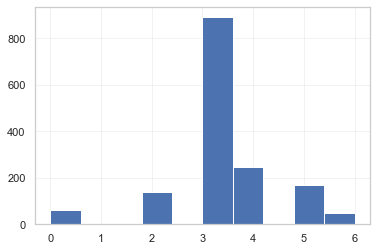

In [315]:
plt.hist(target)

In [316]:
# Chia dữ liệu tành tập train và tập test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs_l, target, test_size =0.33, random_state=30)

In [317]:
# import tree từ lib sklearn và huấn luyện mô hình với tham số entropy tương ứng thuât toán id3
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy')

model.fit(X_train, y_train) # train trên tập huấn luyện

DecisionTreeClassifier(criterion='entropy')

In [318]:
# test mô hình trên tập test - Đánh giá mô hình
model.score(X_test, y_test)

0.4621359223300971

In [321]:
y_label = list(y_test)
y_predict = (model.predict(X_test))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_label, y_predict)
cm

array([[  2,   8,  18,   1,   1,   0],
       [  2,   6,  32,   4,   1,   0],
       [ 12,  20, 210,  21,   9,   7],
       [  3,   4,  55,  11,   6,   3],
       [  0,   1,  38,  10,   8,   4],
       [  0,   0,  11,   3,   3,   1]], dtype=int64)

 ## E. Evaluating Models <a class="anchor" id="E"></a>
 
 Chúng tôi có cải thiện hơn về kết quả của mô hình bằng cách sử dụng các nhãn để phân cụm giá, phân đoạn giá cho dự đoán gợi ý người mua hàng tuy nhiên vẫn có thể tăng độ chính xác lên cao hơn nữa sẽ được xem xét trong lần tới
 
 Qua việc sử dụng 2 mô hình thì lựa chọn sử dụng mô hình cây quyết định với cách sử dụng cách lựa chọn thuộc tính entropy đem lại kết quả 46% cao hơn cho với 3.6% của mô hình hồi quy tuyến tính trước đó

Text(66.5, 0.5, 'Truth')

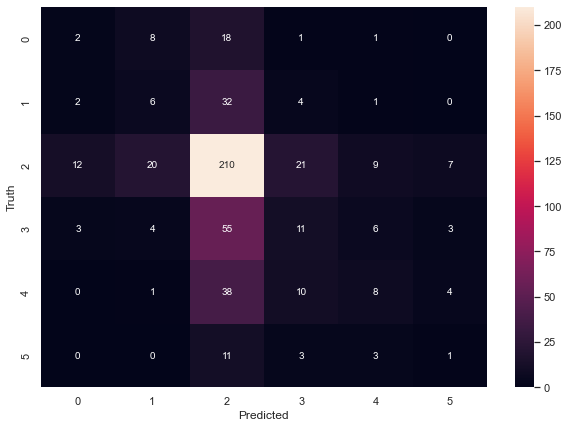

In [323]:
import seaborn as sn
%matplotlib inline
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## F. Conclusion <a class="anchor" id="F"></a>
   
Trên đây là toàn bộ bài phân tích từ xử lý dữ liệu thô chiếm khá nhiều thời gian đến việc phân tích bề mặt và đi vào khá chuyên sâu ở file báo cáo chúng tôi cũng có sử dụng một số trường dữ liệu cho là quan trọng để dự đoán dự báo và gợi ý khách hàng mua laptop theo phân khúc phù hợp

Kết quả mô hình gợi ý mua hàng khi khách điền thông tin có thể đưa ra phân khúc giá phù hợp chúng tôi đề cập ở trên 6 phân khúc từ cao đến thấp